Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0739
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0658
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0512
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0378
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0258
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0187
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 13/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106
Epoch 14/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083
Epoch 15/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090
Epoc

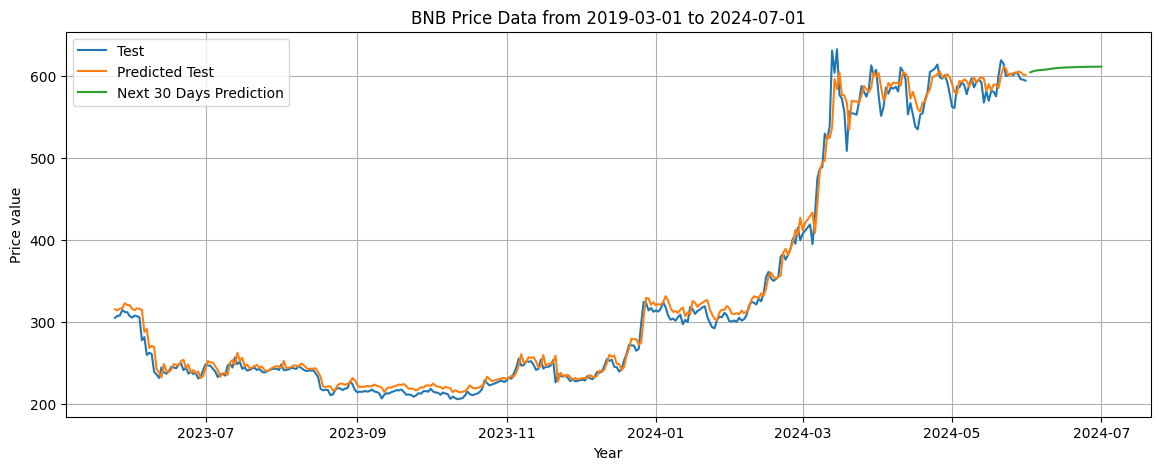

Predicted BNB prices for the next 60 days:
[603.88524051 605.10763869 605.85878532 606.32753105 606.68912354
 606.93509075 607.16125012 607.49901752 607.91856185 608.4178546
 608.80888042 609.10886178 609.34293633 609.53182674 609.69120427
 609.83137058 609.95912716 610.07865036 610.18978108 610.29061013
 610.37855216 610.45416401 610.5189969  610.57503955 610.6238432
 610.66679996 610.70510307 610.7389514  610.76910068 610.79571001
 610.81901803 610.83958159 610.85752001 610.8729924  610.8867147
 610.89888578 610.90970452 610.91913114 610.92728497 610.93468307
 610.94100726 610.94665528 610.9516669  610.95600235 610.95978096
 610.96312204 610.9661847  610.96896893 610.97119632 610.97310551
 610.97473627 610.97620794 610.97771938 610.97875353 610.98002632
 610.98094114 610.98173663 610.9824128  610.98285033 610.98348672]


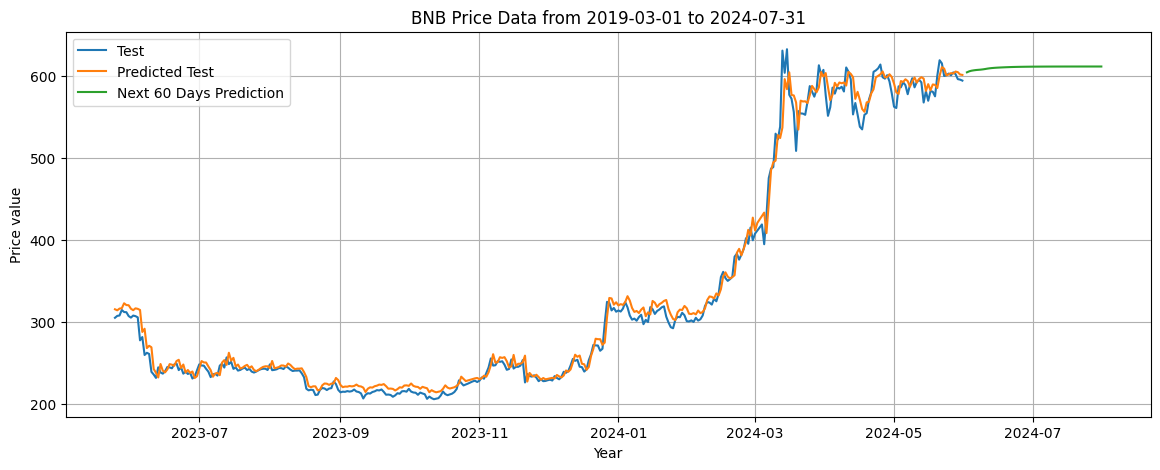

Predicted BNB prices for the next 90 days:
[603.88524051 605.10763869 605.85878532 606.32753105 606.68912354
 606.93509075 607.16125012 607.49901752 607.91856185 608.4178546
 608.80888042 609.10886178 609.34293633 609.53182674 609.69120427
 609.83137058 609.95912716 610.07865036 610.18978108 610.29061013
 610.37855216 610.45416401 610.5189969  610.57503955 610.6238432
 610.66679996 610.70510307 610.7389514  610.76910068 610.79571001
 610.81901803 610.83958159 610.85752001 610.8729924  610.8867147
 610.89888578 610.90970452 610.91913114 610.92728497 610.93468307
 610.94100726 610.94665528 610.9516669  610.95600235 610.95978096
 610.96312204 610.9661847  610.96896893 610.97119632 610.97310551
 610.97473627 610.97620794 610.97771938 610.97875353 610.98002632
 610.98094114 610.98173663 610.9824128  610.98285033 610.98348672
 610.9840038  610.98424244 610.98467997 610.98495839 610.98531636
 610.98555501 610.98587321 610.98611186 610.98635051 610.98662893
 610.98670848 610.98690735 610.98702

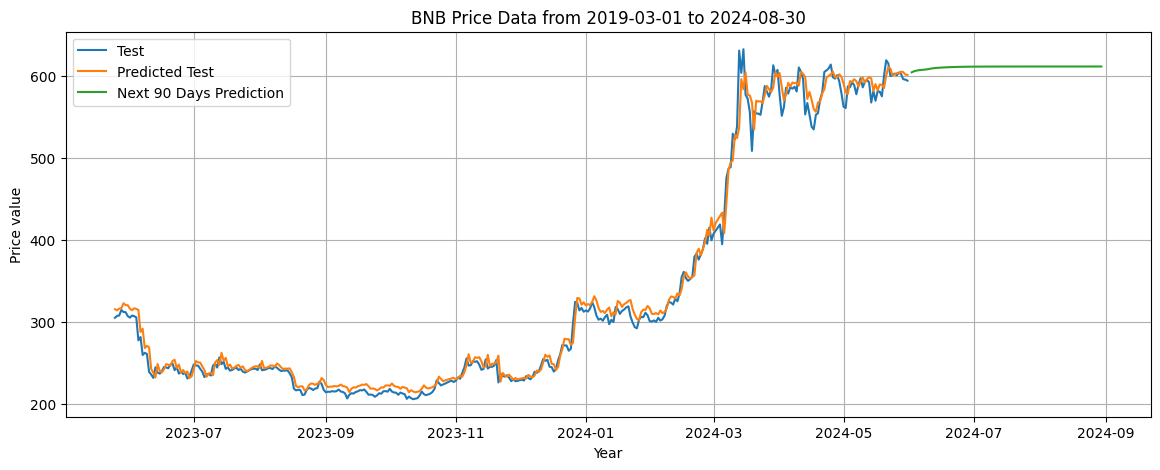

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Model
from keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Add

# Load data
df = pd.read_csv(r'/Users/khoanguyen/Downloads/BNB-Historical-Data.csv', on_bad_lines='skip', low_memory=False)
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
# Select the Close column as the dependent variable
df_Price = df[['Price']]
df_Price = df_Price.reset_index(drop=True)


# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Price))

# Function to create dataset for time series
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Set time step
time_step = 10

# Split data into train and test sets
train_size = int(0.8 * len(data_scaled))
test_size = len(data_scaled) - train_size
train_data, test_data = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:1]

# Create dataset for training and testing
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Define Pyraformer model
def pyraformer_model(input_shape, num_heads=2, ff_dim=32, num_layers=1, dropout=0.1):
    inputs = Input(shape=input_shape)
    
    # Initial embedding and positional encoding
    x = Dense(ff_dim)(inputs)
    
    for _ in range(num_layers):
        # Multi-head self-attention
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
        attn_output = Dropout(dropout)(attn_output)
        x = Add()([x, attn_output])
        x = LayerNormalization(epsilon=1e-6)(x)
        
        # Feedforward network
        ff_output = Dense(ff_dim, activation='relu')(x)
        ff_output = Dense(ff_dim)(ff_output)
        ff_output = Dropout(dropout)(ff_output)
        x = Add()([x, ff_output])
        x = LayerNormalization(epsilon=1e-6)(x)
    
    x = Dense(1)(x)
    outputs = x[:, -1, :]  # Take the last time step output
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (time_step, 1)
model = pyraformer_model(input_shape)

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict the closing prices for the test data
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Evaluate the accuracy of the test data
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

print(f"MAPE on Test dataset: {test_mape}")
print(f"RMSE on Test dataset: {test_rmse}")
print(f"MSE on Test dataset: {test_mse}")

# The process of creating index to predict the next 30 days
last_index = len(df_Price) - 1

# Create an array of 30 consecutive integers starting from last_index
x_input = data_scaled[last_index-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Predict the closing prices for the next 30 days
lst_output = []
n_steps = time_step
i = 0
while(i < 30):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

# Inverse transform the predicted values
y_next_30_days = scaler.inverse_transform(lst_output)



# Print the predicted closing prices for the next 30 days
print('Predicted BNB prices for the next 30 days:')
print(y_next_30_days.flatten())

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)
# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_test)], y_test, label='Test')
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_pred)], y_pred, label='Predicted Test')
plt.plot(index_next_30_days, y_next_30_days, label='Next 30 Days Prediction')
plt.legend()
plt.grid()
plt.title(f"BNB Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Year")
plt.ylabel("Price value")
plt.show()

# The process of creating index to predict the next 60 days
last_index = len(df_Price) - 1

# Create an array of 60 consecutive integers starting from last_index
x_input = data_scaled[last_index-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Predict the closing prices for the next 60 days
lst_output = []
n_steps = time_step
i = 0
while(i < 60):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

# Inverse transform the predicted values
y_next_60_days = scaler.inverse_transform(lst_output)


# Print the predicted closing prices for the next 60 days
print('Predicted BNB prices for the next 60 days:')
print(y_next_60_days.flatten())

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)
# Create a list of indices starting from the next date for 60 days
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_test)], y_test, label='Test')
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_pred)], y_pred, label='Predicted Test')
plt.plot(index_next_60_days, y_next_60_days, label='Next 60 Days Prediction')
plt.legend()
plt.grid()
plt.title(f"BNB Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Year")
plt.ylabel("Price value")
plt.show()

# The process of creating index to predict the next 90 days
last_index = len(df_Price) - 1

# Create an array of 90 consecutive integers starting from last_index
x_input = data_scaled[last_index-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Predict the closing prices for the next 90 days
lst_output = []
n_steps = time_step
i = 0
while(i < 90):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

# Inverse transform the predicted values
y_next_90_days = scaler.inverse_transform(lst_output)


# Print the predicted closing prices for the next 90 days
print('Predicted BNB prices for the next 90 days:')
print(y_next_90_days.flatten())

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)
# Create a list of indices starting from the next date for 90 days
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_test)], y_test, label='Test')
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_pred)], y_pred, label='Predicted Test')
plt.plot(index_next_90_days, y_next_90_days, label='Next 90 Days Prediction')
plt.legend()
plt.grid()
plt.title(f"BNB Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Year")
plt.ylabel("Price value")
plt.show()